## Loading libraries

In [226]:
import bamboolib as bam 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
from plotly.subplots import make_subplots

## Importing excel data

In [8]:
kickstarterData=pd.read_excel("KickstarterData.xlsx")
kickstarterData.head()

Donate ID Donate Date  Gender  Deposit Amount Preferred Color of Device  \
0          1  2019-07-01  female             100                     white   
1          2  2019-07-01  female             100                      blue   
2          3  2019-07-01  female             100                    silver   
3          4  2019-07-01  female             100                    silver   
4          5  2019-07-01    male             100                     white   

   Ice Cream Products Consumed Per Week Favorite Flavor Of Ice Cream  \
0                                     4                      vanilla   
1                                     5                      vanilla   
2                                     6                      vanilla   
3                                     5                      vanilla   
4                                     1                      vanilla   

  Donated To Kick Starter Before Household Income Do you own a Keurig  \
0                            yes             <50K                 yes   
1                            yes             <50K                 yes   
2                            yes             <50K                 yes   
3                            yes             <50K                 yes   
4                            yes             <50K                 yes   

   How many desserts do you eat a week  Purchased  
0                                    7          0  
1                                    5          1  
2                                    6          1  
3                                    5          1  
4                                    7          0

## Data Cleanup

In [10]:
# Size of the dataset
kickstarterData.shape

(10000, 12)

In [11]:
# data types
kickstarterData.dtypes

Donate ID                                        int64
Donate Date                             datetime64[ns]
Gender                                          object
Deposit Amount                                   int64
Preferred Color of Device                       object
Ice Cream Products Consumed Per Week             int64
Favorite Flavor Of Ice Cream                    object
Donated To Kick Starter Before                  object
Household Income                                object
Do you own a Keurig                             object
How many desserts do you eat a week              int64
Purchased                                        int64
dtype: object

In [12]:
kickstarterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Donate ID                             10000 non-null  int64         
 1   Donate Date                           10000 non-null  datetime64[ns]
 2   Gender                                10000 non-null  object        
 3   Deposit Amount                        10000 non-null  int64         
 4   Preferred Color of Device             10000 non-null  object        
 5   Ice Cream Products Consumed Per Week  10000 non-null  int64         
 6   Favorite Flavor Of Ice Cream          10000 non-null  object        
 7   Donated To Kick Starter Before        10000 non-null  object        
 8   Household Income                      10000 non-null  object        
 9   Do you own a Keurig                   10000 non-null  object        
 10 

In [13]:
# columns of the dataset 
kickstarterData.columns

Index(['Donate ID', 'Donate Date', 'Gender', 'Deposit Amount',
       'Preferred Color of Device', 'Ice Cream Products Consumed Per Week',
       'Favorite Flavor Of Ice Cream', 'Donated To Kick Starter Before',
       'Household Income', 'Do you own a Keurig',
       'How many desserts do you eat a week', 'Purchased'],
      dtype='object')

In [14]:
# Summary of the dataset
kickstarterData.describe()

Donate ID  Deposit Amount  Ice Cream Products Consumed Per Week  \
count  10000.00000    10000.000000                          10000.000000   
mean    5000.50000      139.515800                              4.962300   
std     2886.89568       80.483091                              3.165293   
min        1.00000        0.000000                              0.000000   
25%     2500.75000      100.000000                              2.000000   
50%     5000.50000      100.000000                              5.000000   
75%     7500.25000      119.000000                              8.000000   
max    10000.00000      400.000000                             10.000000   

       How many desserts do you eat a week     Purchased  
count                         10000.000000  10000.000000  
mean                              6.686800      0.651300  
std                               2.460592      0.476583  
min                               0.000000      0.000000  
25%                               5.000000      0.000000  
50%                               7.000000      1.000000  
75%                               9.000000      1.000000  
max                              10.000000      1.000000

In [15]:
# checking for null data
kickstarterData.isnull().sum()

Donate ID                               0
Donate Date                             0
Gender                                  0
Deposit Amount                          0
Preferred Color of Device               0
Ice Cream Products Consumed Per Week    0
Favorite Flavor Of Ice Cream            0
Donated To Kick Starter Before          0
Household Income                        0
Do you own a Keurig                     0
How many desserts do you eat a week     0
Purchased                               0
dtype: int64

In [16]:
# Total number of Unique values 
kickstarterData.nunique()

Donate ID                               10000
Donate Date                                 7
Gender                                      2
Deposit Amount                            302
Preferred Color of Device                   6
Ice Cream Products Consumed Per Week       11
Favorite Flavor Of Ice Cream                5
Donated To Kick Starter Before              2
Household Income                            4
Do you own a Keurig                         2
How many desserts do you eat a week        11
Purchased                                   2
dtype: int64

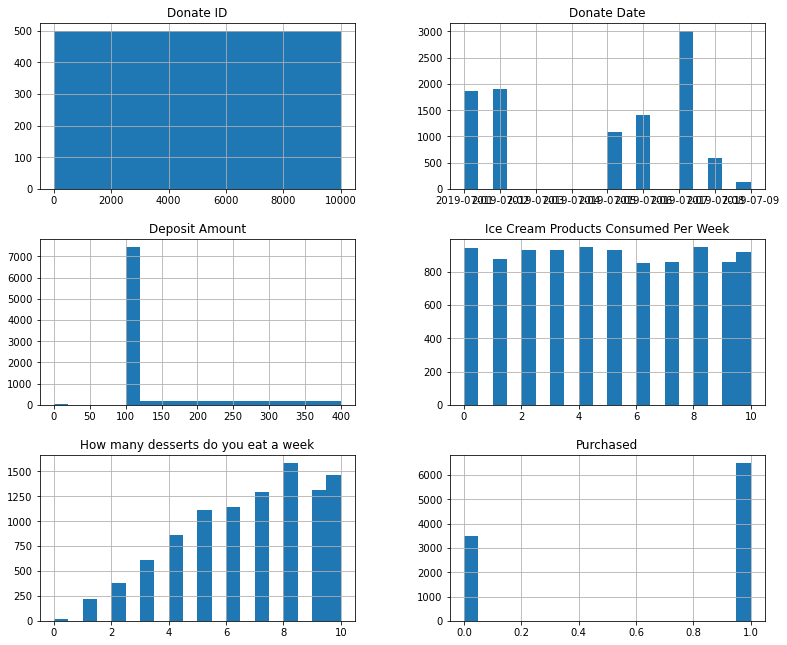

In [17]:
# Histogram of numerical values
kickstarterData.hist(figsize=(13,11),bins=20)
plt.show()

In [19]:
# Checking for duplicate ids 
kickstarterData["Donate ID"].duplicated().sum()

0

##### No duplicate rows

## Cattegorical means of the dataset 

In [53]:
kickstarterData.columns

Index(['Donate ID', 'Donate Date', 'Gender', 'Deposit Amount',
       'Preferred Color of Device', 'Ice Cream Products Consumed Per Week',
       'Favorite Flavor Of Ice Cream', 'Donated To Kick Starter Before',
       'Household Income', 'Do you own a Keurig',
       'How many desserts do you eat a week', 'Purchased'],
      dtype='object')

In [66]:
# Gender 
(kickstarterData.groupby('Gender').mean()).sort_values(by=['Purchased'], ascending=False)

Donate ID  Deposit Amount  Ice Cream Products Consumed Per Week  \
Gender                                                                      
female  4748.153407      139.974397                              4.939695   
male    5226.626280      139.104854                              4.982556   

        How many desserts do you eat a week  Purchased  
Gender                                                  
female                             6.723022   0.681972  
male                               6.654342   0.623815

In [67]:
# Preferred Color of Device 
kickstarterData.groupby('Preferred Color of Device').mean().sort_values(by=['Purchased'], ascending=False)

Donate ID  Deposit Amount  \
Preferred Color of Device                                
red                        5114.355030      136.557396   
black                      5061.716946      140.621353   
silver                     5023.299531      142.144197   
white                      5025.237864      137.661408   
blue                       4982.914252      139.272028   
no preference              4794.356106      140.847642   

                           Ice Cream Products Consumed Per Week  \
Preferred Color of Device                                         
red                                                    4.996450   
black                                                  4.878336   
silver                                                 4.978898   
white                                                  5.046117   
blue                                                   4.917800   
no preference                                          4.954051   

                           How many desserts do you eat a week  Purchased  
Preferred Color of Device                                                  
red                                                   6.668639   0.747337  
black                                                 6.611421   0.746741  
silver                                                6.676436   0.739156  
white                                                 6.714199   0.738471  
blue                                                  6.670018   0.736842  
no preference                                         6.779323   0.195284

In [68]:
# Favorite Flavor Of Ice Cream 
(kickstarterData.groupby('Favorite Flavor Of Ice Cream').mean()).sort_values(by=['Purchased'], ascending=False)

Donate ID  Deposit Amount  \
Favorite Flavor Of Ice Cream                                
chocolate                     4929.200204      134.141471   
vanilla                       5014.134596      137.347458   
swirl                         4800.783745      140.196420   
specialty                     5176.356849      141.426365   
no preference                 5091.054267      144.328564   

                              Ice Cream Products Consumed Per Week  \
Favorite Flavor Of Ice Cream                                         
chocolate                                                 5.007661   
vanilla                                                   4.993519   
swirl                                                     4.959845   
specialty                                                 4.864573   
no preference                                             4.983720   

                              How many desserts do you eat a week  Purchased  
Favorite Flavor Of Ice Cream                                                  
chocolate                                                6.907048   0.827375  
vanilla                                                  6.678963   0.693918  
swirl                                                    6.705854   0.668602  
specialty                                                6.536045   0.648816  
no preference                                            6.606808   0.423779

In [69]:
# Donated To Kick Starter Before 
(kickstarterData.groupby('Donated To Kick Starter Before').mean()).sort_values(by=['Purchased'], ascending=False)

Donate ID  Deposit Amount  \
Donated To Kick Starter Before                                
yes                             5256.978390      153.030491   
no                              4466.354501      111.369914   

                                Ice Cream Products Consumed Per Week  \
Donated To Kick Starter Before                                         
yes                                                         5.001776   
no                                                          4.880086   

                                How many desserts do you eat a week  Purchased  
Donated To Kick Starter Before                                                  
yes                                                        6.673475   0.675844  
no                                                         6.714550   0.600185

In [70]:
# Household Income 
(kickstarterData.groupby('Household Income').mean()).sort_values(by=['Purchased'], ascending=False)

Donate ID  Deposit Amount  \
Household Income                                
>100K             3862.643243      155.779580   
<100K             5614.561297      159.435852   
Not Reported      5043.982295      128.349927   
<50K              4949.287088       99.175824   

                  Ice Cream Products Consumed Per Week  \
Household Income                                         
>100K                                         4.808408   
<100K                                         4.996793   
Not Reported                                  5.010206   
<50K                                          4.865385   

                  How many desserts do you eat a week  Purchased  
Household Income                                                  
>100K                                        6.466066   0.962162  
<100K                                        6.564505   0.625445  
Not Reported                                 6.810873   0.601125  
<50K                                         6.844780   0.370879

In [71]:
# Do you own a Keurig 
(kickstarterData.groupby('Do you own a Keurig').mean()).sort_values(by=['Purchased'], ascending=False)

Donate ID  Deposit Amount  \
Do you own a Keurig                                
no                   5926.754828      137.205472   
yes                  4788.290192      140.045108   

                     Ice Cream Products Consumed Per Week  \
Do you own a Keurig                                         
no                                               5.021996   
yes                                              4.948623   

                     How many desserts do you eat a week  Purchased  
Do you own a Keurig                                                  
no                                              6.695279   0.700644  
yes                                             6.684857   0.639995

# Outlier

In [222]:
kickstarterData.columns

Index(['Donate ID', 'Donate Date', 'Gender', 'Deposit Amount',
       'Preferred Color of Device', 'Ice Cream Products Consumed Per Week',
       'Favorite Flavor Of Ice Cream', 'Donated To Kick Starter Before',
       'Household Income', 'Do you own a Keurig',
       'How many desserts do you eat a week', 'Purchased'],
      dtype='object')

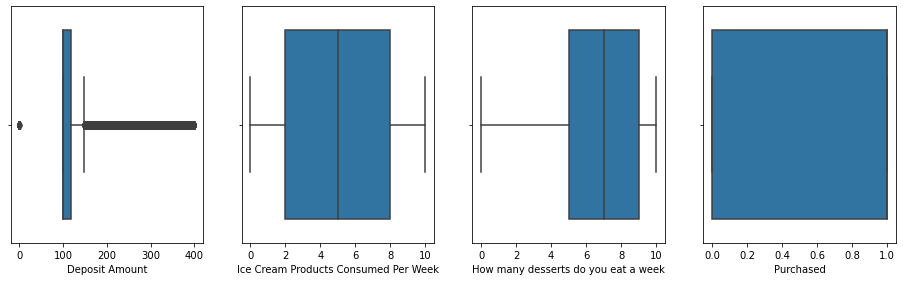

In [223]:
df_describe = kickstarterData.drop(columns = ['Donate ID', 'Donate Date','Gender',
                                                  'Preferred Color of Device', 
                                                  'Favorite Flavor Of Ice Cream', 
                                                  'Donated To Kick Starter Before', 
                                                  'Do you own a Keurig', 
                                                  'Household Income'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)comb
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

## Data Visulizations

##### Count plots

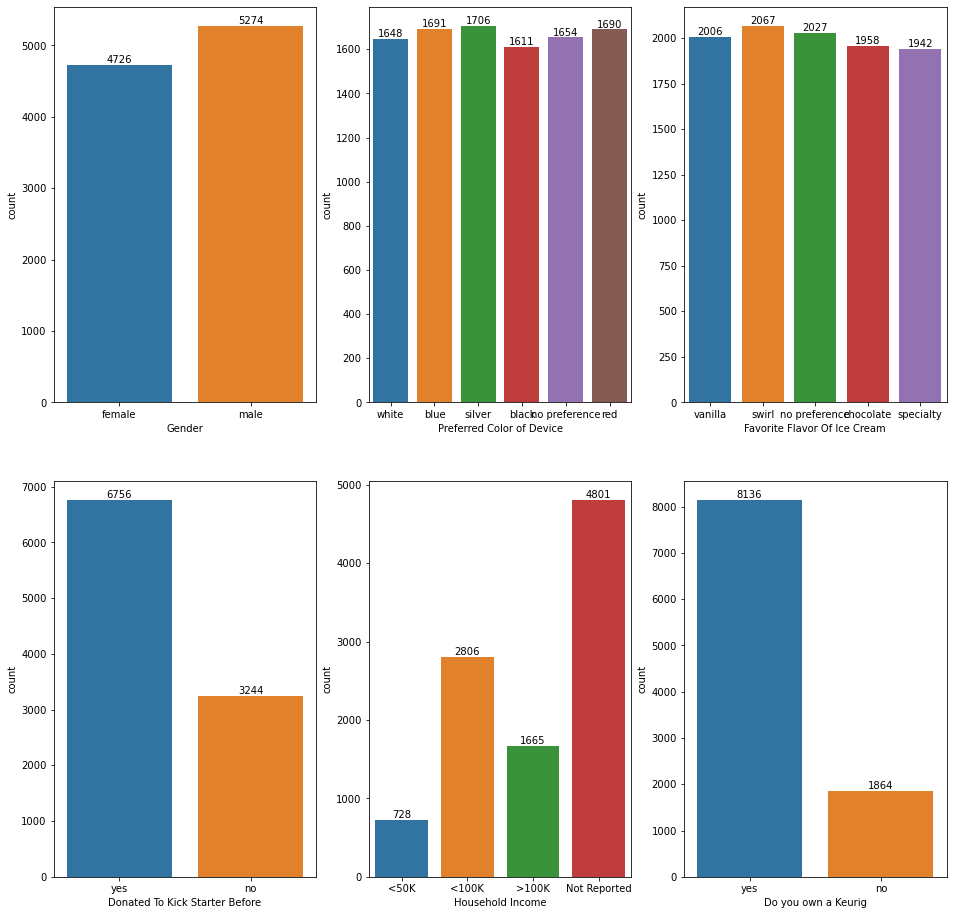

In [224]:
# dataset exploration based on categorical values
fig, ax = plt.subplots(2,3, figsize=(16,16))
a=sns.countplot(data=kickstarterData, x='Gender' , ax=ax[0,0])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=kickstarterData, x='Preferred Color of Device' , ax=ax[0,1])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=kickstarterData, x='Favorite Flavor Of Ice Cream' , ax=ax[0,2])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=kickstarterData, x='Donated To Kick Starter Before' , ax=ax[1,0])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=kickstarterData, x='Household Income' , ax=ax[1,1])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=kickstarterData, x='Do you own a Keurig' , ax=ax[1,2])
for container in a.containers:
    a.bar_label(container)


In [37]:
# Percentages of dation to purchase conversion
print("Percentage of people who donated and also bought the Icecibed machine is:",(kickstarterData['Purchased'].sum() / len(kickstarterData.loc[kickstarterData['Deposit Amount'] > 0])) * 100)

Percentage of people who donated and also bought the Icecibed machine is: 65.3850015058729


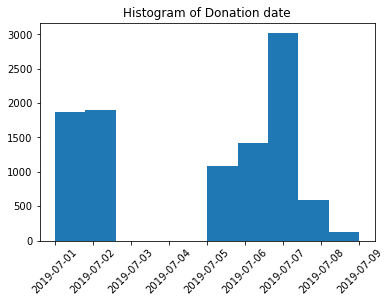

In [20]:
# Distribution of donations for dates mentioned. 
plt.hist(kickstarterData["Donate Date"])
plt.xticks(rotation=45)
plt.title("Histogram of Donation date")
plt.show() 

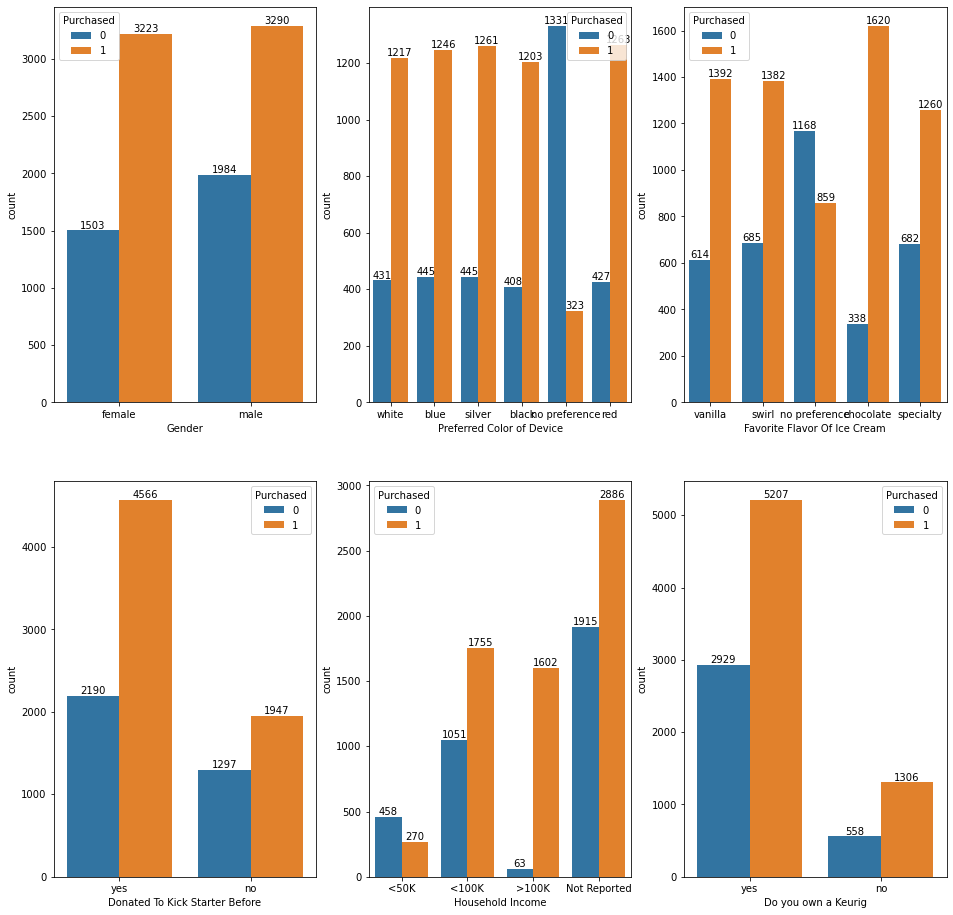

In [181]:

fig, ax = plt.subplots(2,3, figsize=(16,16))
a = sns.countplot(data=kickstarterData, x='Gender' , ax=ax[0,0], hue='Purchased')
for container in a.containers:
    a.bar_label(container)
b = sns.countplot(data=kickstarterData, x='Preferred Color of Device' , ax=ax[0,1], hue='Purchased')
for container in b.containers:
    b.bar_label(container)
c = sns.countplot(data=kickstarterData, x='Favorite Flavor Of Ice Cream' , ax=ax[0,2], hue='Purchased')
for container in c.containers:
    c.bar_label(container)
d = sns.countplot(data=kickstarterData, x='Donated To Kick Starter Before' , ax=ax[1,0], hue='Purchased')
for container in d.containers:
    d.bar_label(container)
e = sns.countplot(data=kickstarterData, x='Household Income' , ax=ax[1,1], hue='Purchased')
for container in e.containers:
    e.bar_label(container)
f = sns.countplot(data=kickstarterData, x='Do you own a Keurig' , ax=ax[1,2], hue='Purchased')
for container in f.containers:
    f.bar_label(container)

##### Histograms

In [237]:
fig = make_subplots(rows=1, cols=3)
DepositeAmount = go.Histogram(x=kickstarterData['Deposit Amount'], name="Deposit Amount" )
IceCreamPerWeek = go.Histogram(x=kickstarterData['Ice Cream Products Consumed Per Week'], name="Ice Cream Products Consumed Per Week" )
DessetsPerWeek = go.Histogram(x=kickstarterData['How many desserts do you eat a week'], name="How many desserts do you eat a week" )

fig.append_trace(DepositeAmount, 1, 1)
fig.append_trace(IceCreamPerWeek, 1, 2)
fig.append_trace(DessetsPerWeek, 1, 3)

fig.show()

In [234]:
fig = px.histogram(kickstarterData, x='Deposit Amount')
fig

In [191]:
fig = px.histogram(kickstarterData, x='Ice Cream Products Consumed Per Week')
fig

In [192]:
fig = px.histogram(kickstarterData, x='How many desserts do you eat a week')
fig

[Text(0, 0, '2019-07-01'),
 Text(1, 0, '2019-07-02'),
 Text(2, 0, '2019-07-05'),
 Text(3, 0, '2019-07-06'),
 Text(4, 0, '2019-07-07'),
 Text(5, 0, '2019-07-08'),
 Text(6, 0, '2019-07-09')]

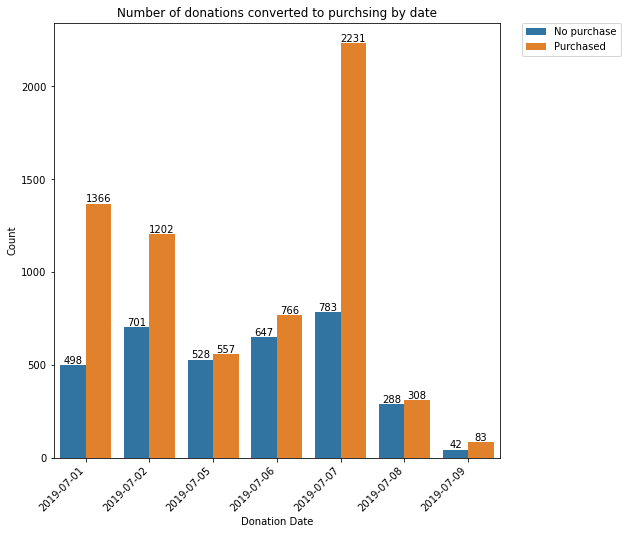

In [33]:
# Grouped bar chart of number of donations per day grouped by Gender categories. 
# Seaborn package Set the figure size
plt.figure(figsize=(8, 8))
# grouped barplot
gb = sns.countplot('Donate Date',data = kickstarterData, hue ='Purchased' )
#plt.xticks(rotation=45)
for container in gb.containers:
    gb.bar_label(container)
plt.ylabel("Count")
plt.title("Number of donations converted to purchsing by date")
plt.xlabel("Donation Date")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels=['No purchase', 'Purchased'])
x_dates = kickstarterData['Donate Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
gb.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [52]:
# Ice cream products consumed per week 
fig = px.histogram(kickstarterData, x='Ice Cream Products Consumed Per Week', y='Purchased')
fig

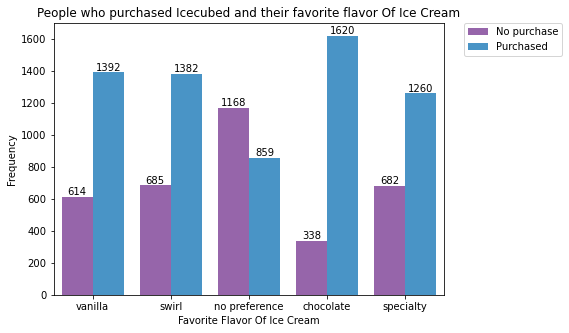

In [51]:
# Fov ice cream flavor 
# People who purchased Icecubed and their income groups
fig = plt.gcf()
fig.set_size_inches(7, 5)
ax = sns.countplot('Favorite Flavor Of Ice Cream',data = kickstarterData, hue ='Purchased', palette=["#9b59b6", "#3498db"] )
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Frequency")
plt.title("People who purchased Icecubed and their favorite flavor Of Ice Cream")
plt.xlabel("Favorite Flavor Of Ice Cream")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels=['No purchase', 'Purchased'])

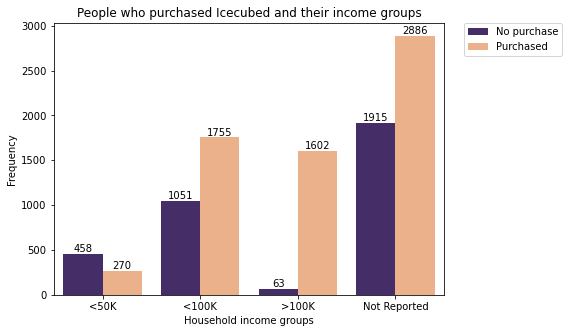

In [27]:
# People who purchased Icecubed and their income groups
fig = plt.gcf()
fig.set_size_inches(7, 5)
ax = sns.countplot('Household Income',data = kickstarterData, hue ='Purchased', palette=['#432371',"#FAAE7B"] )
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Frequency")
plt.title("People who purchased Icecubed and their income groups")
plt.xlabel("Household income groups")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels=['No purchase', 'Purchased'])

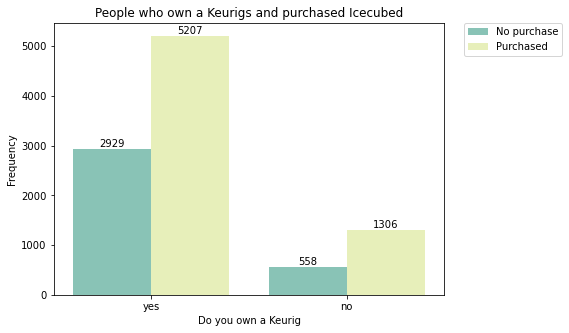

In [29]:
# Number of people who owned Keurig and also bought Icecubed
fig = plt.gcf()
fig.set_size_inches(7, 5)
palette = sns.color_palette("bright")
ax = sns.countplot('Do you own a Keurig',data = kickstarterData, hue ='Purchased', palette=["#7fcdbb", "#edf8b1"] )
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Frequency")
plt.title("People who own a Keurigs and purchased Icecubed")
plt.xlabel("Do you own a Keurig")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels=['No purchase', 'Purchased'])

In [49]:
# Number of desserts per week to purchase histogram 
fig = px.histogram(kickstarterData, x='How many desserts do you eat a week', y='Purchased', color_discrete_sequence = ['darkred'])
fig

## Outliers

In [44]:
kickstarterData_boxplots = kickstarterData.drop(columns = ['Donate ID','Donate Date', 'Gender','Preferred Color of Device',
       'Favorite Flavor Of Ice Cream', 'Donated To Kick Starter Before', 'Household Income', 'Do you own a Keurig', 'Purchased'])

fig = go.Figure()

for col in kickstarterData_boxplots:
  fig.add_trace(go.Box(y=kickstarterData_boxplots[col].values, name=kickstarterData_boxplots[col].name))
  
fig.show()

## Correlation Analysis

<AxesSubplot:>

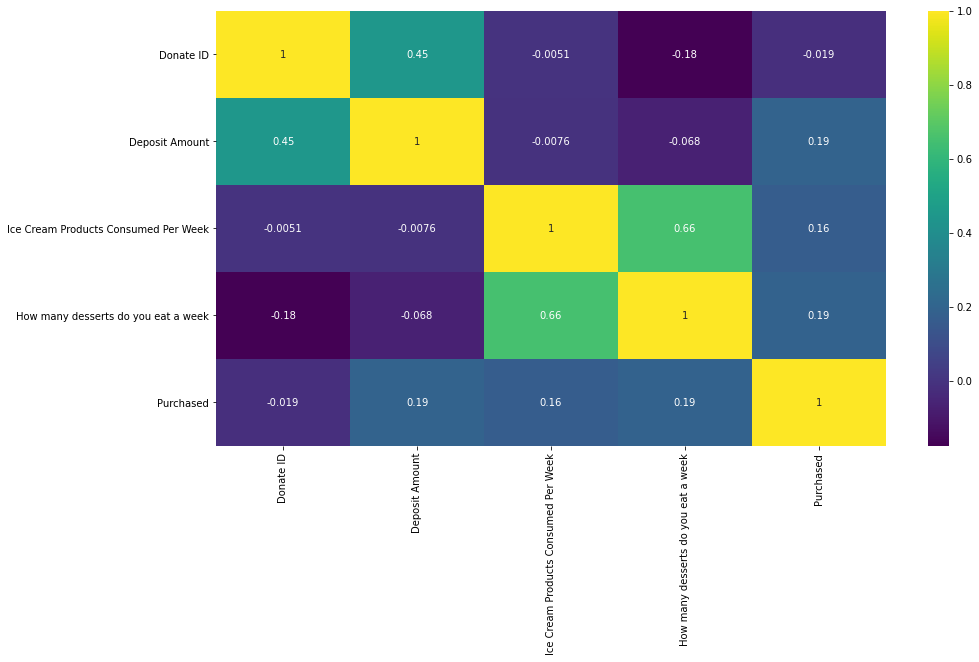

In [239]:
plt.figure(figsize=(15,8))
sns.heatmap(kickstarterData.corr(), annot=True, cmap='viridis')

In [78]:
# Creating dummy variables for categorical analysis 
kickstarterData_wDummmy = kickstarterData.copy()
kickstarterData_wDummmy=pd.get_dummies(kickstarterData_wDummmy,columns=['Gender',
                                                  'Preferred Color of Device', 
                                                  'Favorite Flavor Of Ice Cream', 
                                                  'Donated To Kick Starter Before', 
                                                  'Do you own a Keurig', 
                                                  'Household Income'])
# Dropping Donation id and date
kickstarterData_wDummmy =kickstarterData_wDummmy.drop(['Donate Date', 'Donate ID'],axis=1)
kickstarterData_wDummmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Deposit Amount                              10000 non-null  int64
 1   Ice Cream Products Consumed Per Week        10000 non-null  int64
 2   How many desserts do you eat a week         10000 non-null  int64
 3   Purchased                                   10000 non-null  int64
 4   Gender_female                               10000 non-null  uint8
 5   Gender_male                                 10000 non-null  uint8
 6   Preferred Color of Device_black             10000 non-null  uint8
 7   Preferred Color of Device_blue              10000 non-null  uint8
 8   Preferred Color of Device_no preference     10000 non-null  uint8
 9   Preferred Color of Device_red               10000 non-null  uint8
 10  Preferred Color of Device_silver   

In [80]:
kickstarterData_wDummmy.head()

Deposit Amount  Ice Cream Products Consumed Per Week  \
0             100                                     4   
1             100                                     5   
2             100                                     6   
3             100                                     5   
4             100                                     1   

   How many desserts do you eat a week  Purchased  Gender_female  Gender_male  \
0                                    7          0              1            0   
1                                    5          1              1            0   
2                                    6          1              1            0   
3                                    5          1              1            0   
4                                    7          0              0            1   

   Preferred Color of Device_black  Preferred Color of Device_blue  \
0                                0                               0   
1                                0                               1   
2                                0                               0   
3                                0                               0   
4                                0                               0   

   Preferred Color of Device_no preference  Preferred Color of Device_red  \
0                                        0                              0   
1                                        0                              0   
2                                        0                              0   
3                                        0                              0   
4                                        0                              0   

   ...  Favorite Flavor Of Ice Cream_swirl  \
0  ...                                   0   
1  ...                                   0   
2  ...                                   0   
3  ...                                   0   
4  ...                                   0   

   Favorite Flavor Of Ice Cream_vanilla  Donated To Kick Starter Before_no  \
0                                     1                                  0   
1                                     1                                  0   
2                                     1                                  0   
3                                     1                                  0   
4                                     1                                  0   

   Donated To Kick Starter Before_yes  Do you own a Keurig_no  \
0                                   1                       0   
1                                   1                       0   
2                                   1                       0   
3                                   1                       0   
4                                   1                       0   

   Do you own a Keurig_yes  Household Income_<100K  Household Income_<50K  \
0                        1                       0                      1   
1                        1                       0                      1   
2                        1                       0                      1   
3                        1                       0                      1   
4                        1                       0                      1   

   Household Income_>100K  Household Income_Not Reported  
0                       0                              0  
1                       0                              0  
2                       0                              0  
3                       0                              0  
4                       0                              0  

[5 rows x 25 columns]

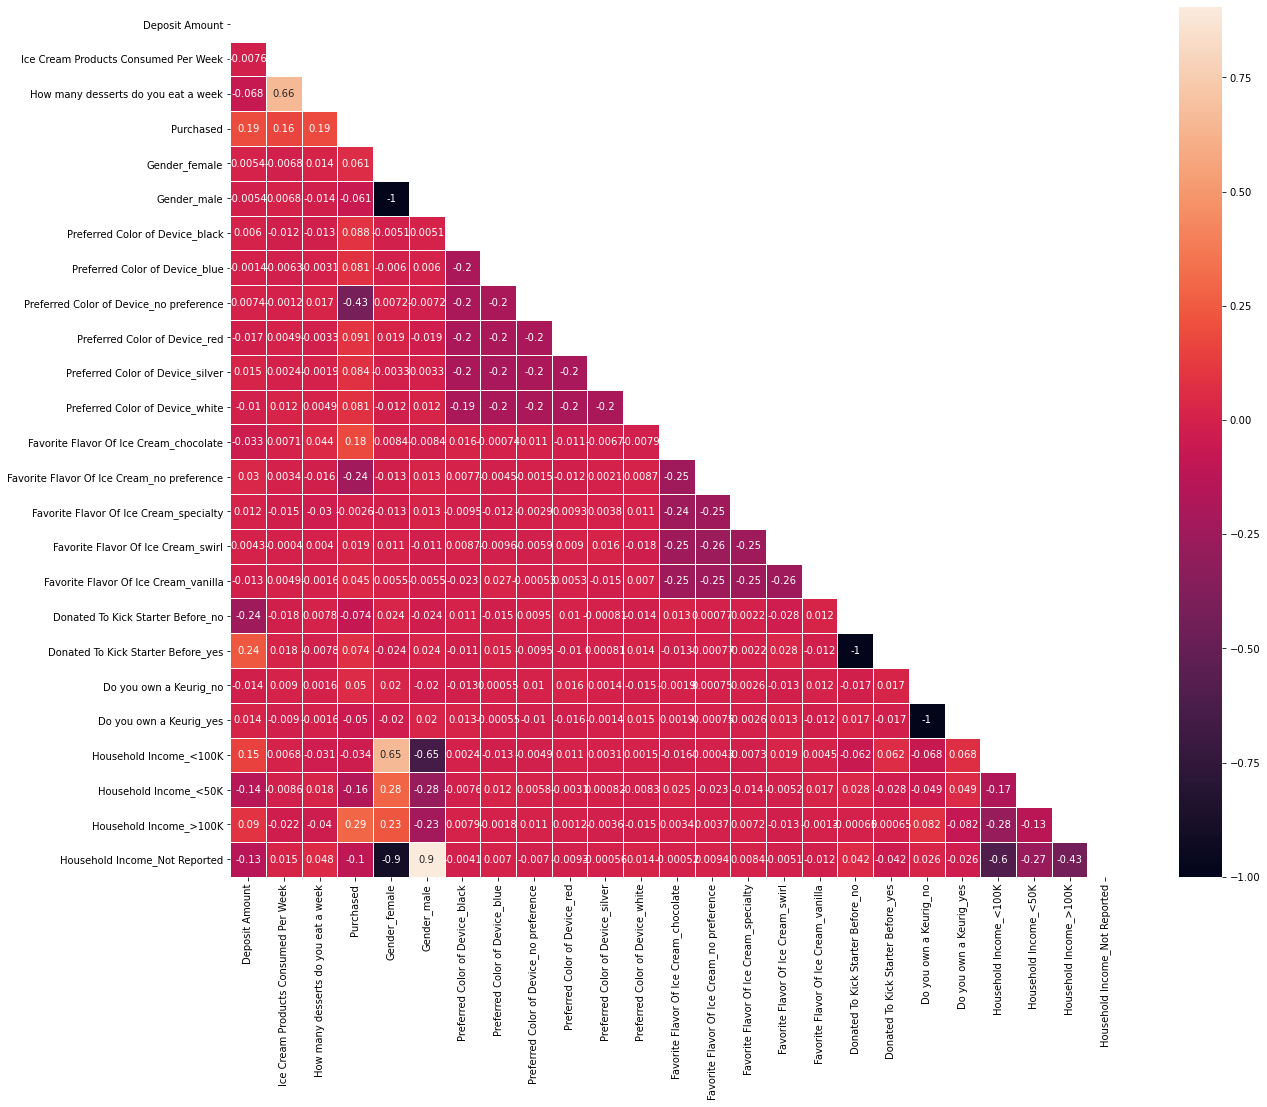

In [79]:
corr=kickstarterData_wDummmy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corr, mask=mask, annot=True, linewidths=.8, ax=ax)
plt.show()

<AxesSubplot:>

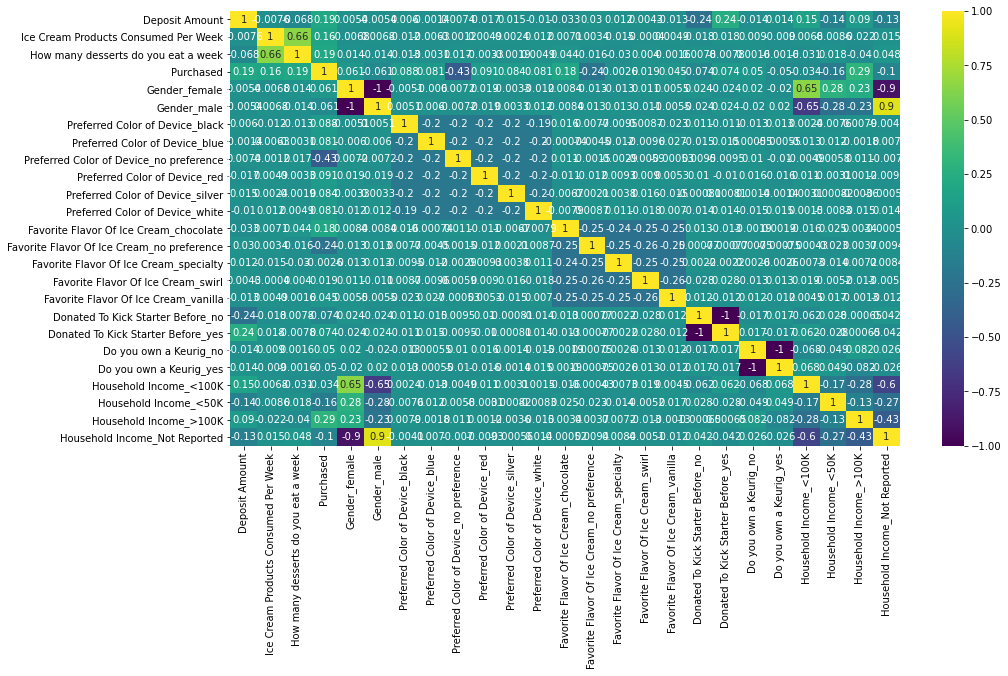

In [158]:
plt.figure(figsize=(15,8))
sns.heatmap(kickstarterData_wDummmy.corr(), annot=True, cmap='viridis')

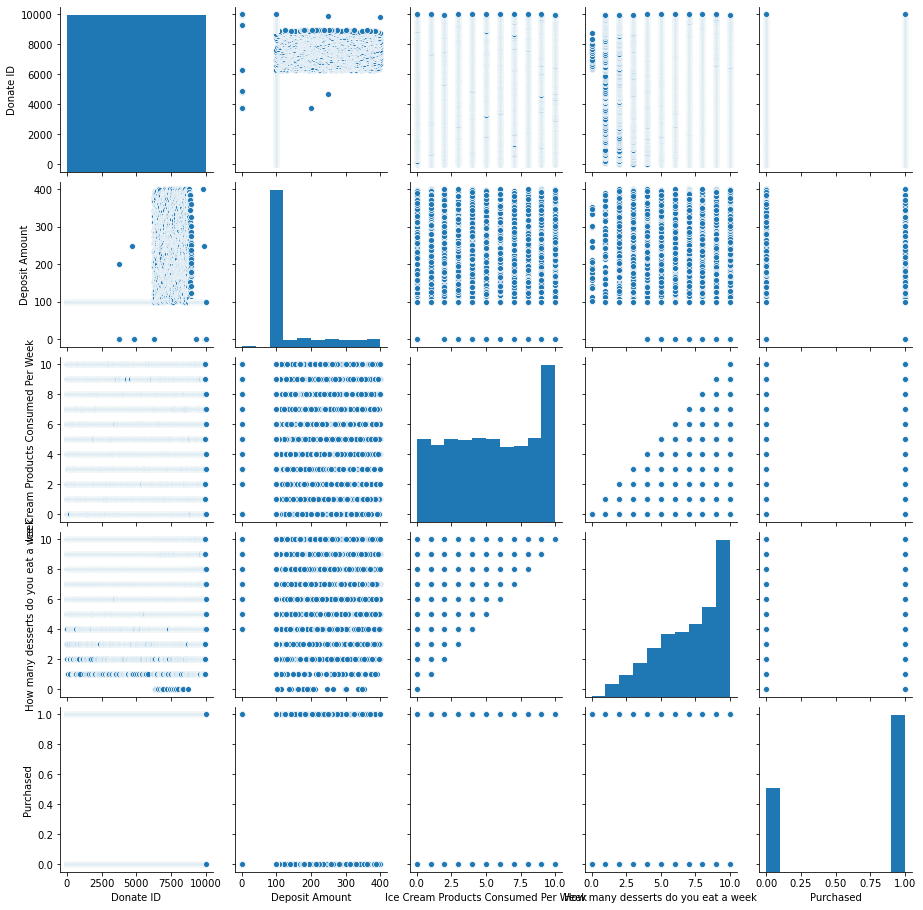

In [160]:
sns.pairplot(kickstarterData)

In [163]:
#Correlation with independent variable purchase
corr['Purchased'].sort_values(ascending = False)[1:]


Household Income_>100K                        0.291545
Deposit Amount                                0.194643
How many desserts do you eat a week           0.189489
Favorite Flavor Of Ice Cream_chocolate        0.182308
Ice Cream Products Consumed Per Week          0.164915
Preferred Color of Device_red                 0.090880
Preferred Color of Device_black               0.087763
Preferred Color of Device_silver              0.083611
Preferred Color of Device_white               0.081253
Preferred Color of Device_blue                0.080977
Donated To Kick Starter Before_yes            0.074324
Gender_female                                 0.060926
Do you own a Keurig_no                        0.049560
Favorite Flavor Of Ice Cream_vanilla          0.044798
Favorite Flavor Of Ice Cream_swirl            0.018532
Favorite Flavor Of Ice Cream_specialty       -0.002559
Household Income_<100K                       -0.033883
Do you own a Keurig_yes                      -0.049560
Gender_mal

## Split dataset into training and testing data 

In [81]:
# 70/30 division of training and test dataset
X_train, X_test, y_train, y_test = train_test_split(kickstarterData_wDummmy.drop('Purchased',axis=1), 
                                                    kickstarterData_wDummmy['Purchased'], test_size=0.30, 
                                                    random_state=100)

## Applying logistic regression on training dataset to predict whethere the purchase was made or not. 

### Model 1 - logistic regression model using sklearn

In [83]:
logit_model1 = LogisticRegression(max_iter=3000)
logit_model1.fit(X_train,y_train)
y_pred = logit_model1.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model1.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [194]:
logit_model_summary=sm.Logit(y_train,X_train)
result=logit_model_summary.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.334569
         Iterations 15
                                             Results: Logit
Model:                             Logit                         Pseudo R-squared:              0.486    
Dependent Variable:                Purchased                     AIC:                           4721.9601
Date:                              2022-03-06 14:36              BIC:                           4852.1798
No. Observations:                  7000                          Log-Likelihood:                -2342.0  
Df Model:                          18                            LL-Null:                       -4555.2  
Df Residuals:                      6981                          LLR p-value:                   0.0000   
Converged:                         1.0000                        Scale:                         1.0000   
No. Iterations:                    15.0000                                                     

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       999
           1       0.88      0.90      0.89      2001

    accuracy                           0.85      3000
   macro avg       0.84      0.82      0.83      3000
weighted avg       0.85      0.85      0.85      3000



In [87]:
# Confusion matrix 
confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
confusionMatrix

array([[ 743,  256],
       [ 192, 1809]])

<AxesSubplot:>

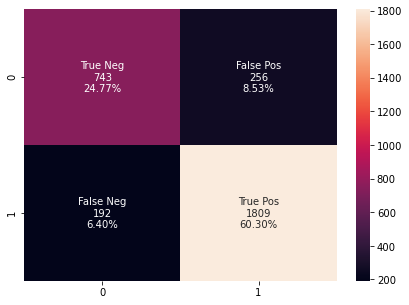

In [88]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusionMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusionMatrix.flatten()/np.sum(confusionMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix, annot=labels, fmt='')

In [89]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8506666666666667
Precision: 0.8760290556900726
Recall: 0.904047976011994


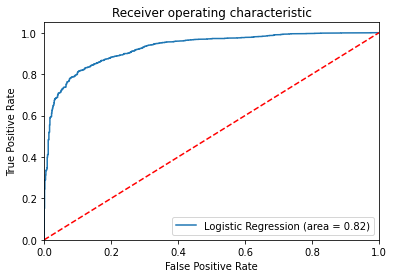

In [92]:
# ROC curve 
logit_roc_auc = roc_auc_score(y_test, logit_model1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit_model1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model 2 - Feature selection using Recursive Feature Elimination

In [95]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True False  True  True  True  True  True]
[5 2 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 3 1 1 1 1 1]


###### The columns selected by RFE are: 
       'How many desserts do you eat a week', 
       'Gender_female',
       'Gender_male', 
       'Preferred Color of Device_black',
       'Preferred Color of Device_blue',
       'Preferred Color of Device_no preference',
       'Preferred Color of Device_red', 
       'Preferred Color of Device_silver',
       'Preferred Color of Device_white',
       'Favorite Flavor Of Ice Cream_chocolate',
       'Favorite Flavor Of Ice Cream_no preference',
       'Favorite Flavor Of Ice Cream_specialty',
       'Favorite Flavor Of Ice Cream_vanilla',
       'Donated To Kick Starter Before_no',
       'Donated To Kick Starter Before_yes', 
       'Do you own a Keurig_yes', 
       'Household Income_<100K',
       'Household Income_<50K', 
       'Household Income_>100K',
       'Household Income_Not Reported'],



In [104]:
kickstarterData_wDummmy2 =kickstarterData_wDummmy.drop(['Deposit Amount', 
                                                       'Ice Cream Products Consumed Per Week',
                                                       'Favorite Flavor Of Ice Cream_swirl',
                                                       'Do you own a Keurig_no'],axis=1)
kickstarterData_wDummmy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   How many desserts do you eat a week         10000 non-null  int64
 1   Purchased                                   10000 non-null  int64
 2   Gender_female                               10000 non-null  uint8
 3   Gender_male                                 10000 non-null  uint8
 4   Preferred Color of Device_black             10000 non-null  uint8
 5   Preferred Color of Device_blue              10000 non-null  uint8
 6   Preferred Color of Device_no preference     10000 non-null  uint8
 7   Preferred Color of Device_red               10000 non-null  uint8
 8   Preferred Color of Device_silver            10000 non-null  uint8
 9   Preferred Color of Device_white             10000 non-null  uint8
 10  Favorite Flavor Of Ice Cream_chocol

In [115]:
# 70/30 division of training and test dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(kickstarterData_wDummmy2.drop('Purchased',axis=1), 
                                                    kickstarterData_wDummmy2['Purchased'], test_size=0.30, 
                                                    random_state=100)

### Logistic regression model using statsmodels.api and RFE results

In [142]:
logit_model=sm.Logit(y_train2,X_train2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.373724
         Iterations 9
                                               Results: Logit
Model:                             Logit                           Pseudo R-squared:                0.426    
Dependent Variable:                Purchased                       AIC:                             5266.1339
Date:                              2022-03-05 18:58                BIC:                             5382.6462
No. Observations:                  7000                            Log-Likelihood:                  -2616.1  
Df Model:                          16                              LL-Null:                         -4555.2  
Df Residuals:                      6983                            LLR p-value:                     0.0000   
Converged:                         1.0000                          Scale:                           1.0000   
No. Iterations:                    9.0000                         

In [197]:
logreg2_rfe = LogisticRegression()
logreg2_rfe.fit(X_train2, y_train2)
y_pred2_rfe = logreg2_rfe.predict(X_test2)

In [198]:
# Confusion matrix 
confusion_matrix2_rfe = confusion_matrix(y_test2, y_pred2_rfe)
print(confusion_matrix2_rfe)

[[ 704  295]
 [ 173 1828]]


<AxesSubplot:>

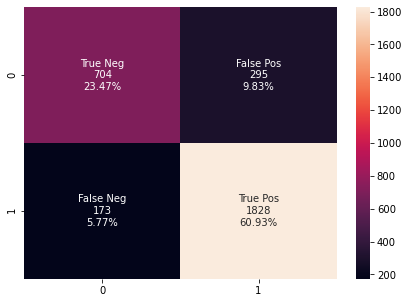

In [199]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix2_rfe.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix2_rfe.flatten()/np.sum(confusion_matrix2_rfe)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix2_rfe, annot=labels, fmt='')

In [200]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2_rfe))
print("Precision:",metrics.precision_score(y_test2, y_pred2_rfe))
print("Recall:",metrics.recall_score(y_test2, y_pred2_rfe))

Accuracy: 0.844
Precision: 0.8610456900612341
Recall: 0.9135432283858071


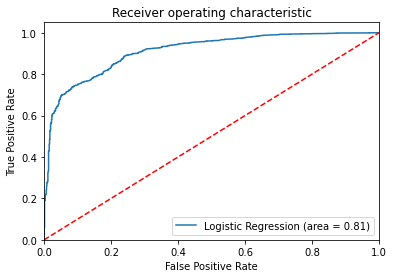

In [202]:
# ROC curve 
logit_roc_auc = roc_auc_score(y_test2, logreg2_rfe.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test2, logreg2_rfe.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Further reduction of columns with p value significantly greater than 0.05

In [151]:
# Further dropping columns with p value significantly more than 0.05
kickstarterData_wDummmy2_1 =kickstarterData_wDummmy2.drop(['Gender_female', 'Gender_male',
                                                       'Preferred Color of Device_black',
                                                       'Preferred Color of Device_blue',
                                                       'Preferred Color of Device_no preference', 'Preferred Color of Device_red',
                                                         'Preferred Color of Device_silver',
                                                         'Preferred Color of Device_white',
                                                         'Donated To Kick Starter Before_no',
                                                         'Donated To Kick Starter Before_yes',
                                                         'Household Income_<100K',
                                                         'Household Income_<50K',
                                                         'Household Income_>100K',
                                                         'Household Income_Not Reported'],axis=1)
kickstarterData_wDummmy2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   How many desserts do you eat a week         10000 non-null  int64
 1   Purchased                                   10000 non-null  int64
 2   Favorite Flavor Of Ice Cream_chocolate      10000 non-null  uint8
 3   Favorite Flavor Of Ice Cream_no preference  10000 non-null  uint8
 4   Favorite Flavor Of Ice Cream_specialty      10000 non-null  uint8
 5   Favorite Flavor Of Ice Cream_vanilla        10000 non-null  uint8
 6   Do you own a Keurig_yes                     10000 non-null  uint8
dtypes: int64(2), uint8(5)
memory usage: 205.2 KB


In [152]:
# 70/30 division of training and test dataset
X_train2_1, X_test2_1, y_train2_1, y_test2_1 = train_test_split(kickstarterData_wDummmy2_1.drop('Purchased',axis=1), 
                                                    kickstarterData_wDummmy2_1['Purchased'], test_size=0.30, 
                                                    random_state=100)

In [204]:
# Prediction using logistic modelling 
logreg2 = LogisticRegression()
logreg2.fit(X_train2_1, y_train2_1)
y_pred2 = logreg2.predict(X_test2_1)

In [205]:
logit_model_summary2=sm.Logit(y_train2_1,X_train2_1)
result=logit_model_summary2.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.593186
         Iterations 6
                                      Results: Logit
Model:                       Logit                    Pseudo R-squared:         0.088      
Dependent Variable:          Purchased                AIC:                      8316.5989  
Date:                        2022-03-06 14:50         BIC:                      8357.7208  
No. Observations:            7000                     Log-Likelihood:           -4152.3    
Df Model:                    5                        LL-Null:                  -4555.2    
Df Residuals:                6994                     LLR p-value:              6.4461e-172
Converged:                   1.0000                   Scale:                    1.0000     
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

In [206]:
# Confusion matrix 
confusion_matrix2 = confusion_matrix(y_test2_1, y_pred2)
print(confusion_matrix2)

[[ 372  627]
 [ 289 1712]]


<AxesSubplot:>

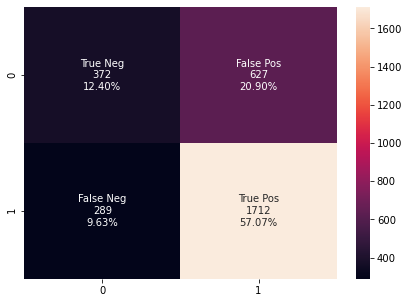

In [207]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix2.flatten()/np.sum(confusion_matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix2, annot=labels, fmt='')

In [208]:
print("Accuracy:",metrics.accuracy_score(y_test2_1, y_pred2))
print("Precision:",metrics.precision_score(y_test2_1, y_pred2))
print("Recall:",metrics.recall_score(y_test2_1, y_pred2))

Accuracy: 0.6946666666666667
Precision: 0.731936725096195
Recall: 0.8555722138930535


In [242]:
classifier = DecisionTreeClassifier(max_depth=3,ccp_alpha=0.01)

In [243]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)

In [244]:
classifier.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [245]:
dec_predict = classifier.predict(X_test)
dec_predict

array([1, 1, 1, ..., 1, 1, 1])

In [246]:
print("Accuracy:",metrics.accuracy_score(y_test, dec_predict))
print("Precision:",metrics.precision_score(y_test, dec_predict))
print("Recall:",metrics.recall_score(y_test, dec_predict))

Accuracy: 0.7883333333333333
Precision: 0.7618865030674846
Recall: 0.9930034982508745


In [248]:
cnf_matrix_d = metrics.confusion_matrix(y_test, dec_predict)
cnf_matrix_d

array([[ 378,  621],
       [  14, 1987]])

<AxesSubplot:>

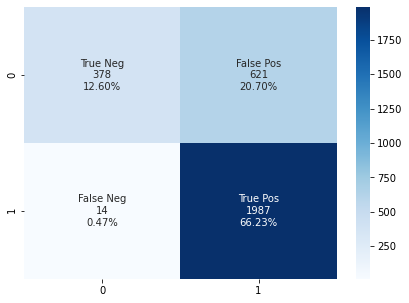

In [249]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names_d = ['True Neg','False Pos','False Neg','True Pos']
group_counts_d = ["{0:0.0f}".format(value) for value in
                cnf_matrix_d.flatten()]
group_percentages_d = ["{0:.2%}".format(value) for value in
                     cnf_matrix_d.flatten()/np.sum(cnf_matrix_d)]
labels_d = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_d,group_counts_d,group_percentages_d)]
labels_d = np.asarray(labels_d).reshape(2,2)
sns.heatmap(cnf_matrix_d, annot=labels_d, fmt='', cmap='Blues')

## Ramdom forest

In [117]:
# splitting the data for random forest
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(kickstarterData_wDummmy.drop('Purchased',axis=1), 
                                                    kickstarterData_wDummmy['Purchased'], test_size=0.30, 
                                                    random_state=101)

In [118]:
rf = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 30)

In [119]:
rf = rf.fit(X_train_R, y_train_R)

In [120]:
rf_y = rf.predict(X_test_R)

In [123]:
print("Accuracy:",metrics.accuracy_score(y_test_R, rf_y))
print("Precision:",metrics.precision_score(y_test_R, rf_y))
print("Recall:",metrics.recall_score(y_test_R, rf_y))
print(classification_report(y_test_R, rf_y))

Accuracy: 0.8906666666666667
Precision: 0.9141865079365079
Recall: 0.9224224224224224
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1002
           1       0.91      0.92      0.92      1998

    accuracy                           0.89      3000
   macro avg       0.88      0.87      0.88      3000
weighted avg       0.89      0.89      0.89      3000



In [125]:
confusion_matrix3 = metrics.confusion_matrix(y_test_R, rf_y)
confusion_matrix3

array([[ 829,  173],
       [ 155, 1843]])

<AxesSubplot:>

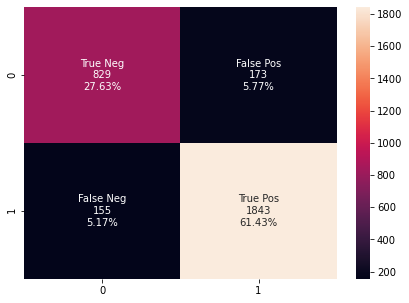

In [130]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names_d = ['True Neg','False Pos','False Neg','True Pos']
group_counts_d = ["{0:0.0f}".format(value) for value in
                confusion_matrix3.flatten()]
group_percentages_d = ["{0:.2%}".format(value) for value in
                     confusion_matrix3.flatten()/np.sum(confusion_matrix3)]
labels_d = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_d,group_counts_d,group_percentages_d)]
labels_d = np.asarray(labels_d).reshape(2,2)
sns.heatmap(Rand_cnf, annot=labels_d, fmt='')

Text(0.5, 0, 'Feature Importance Random Forest')

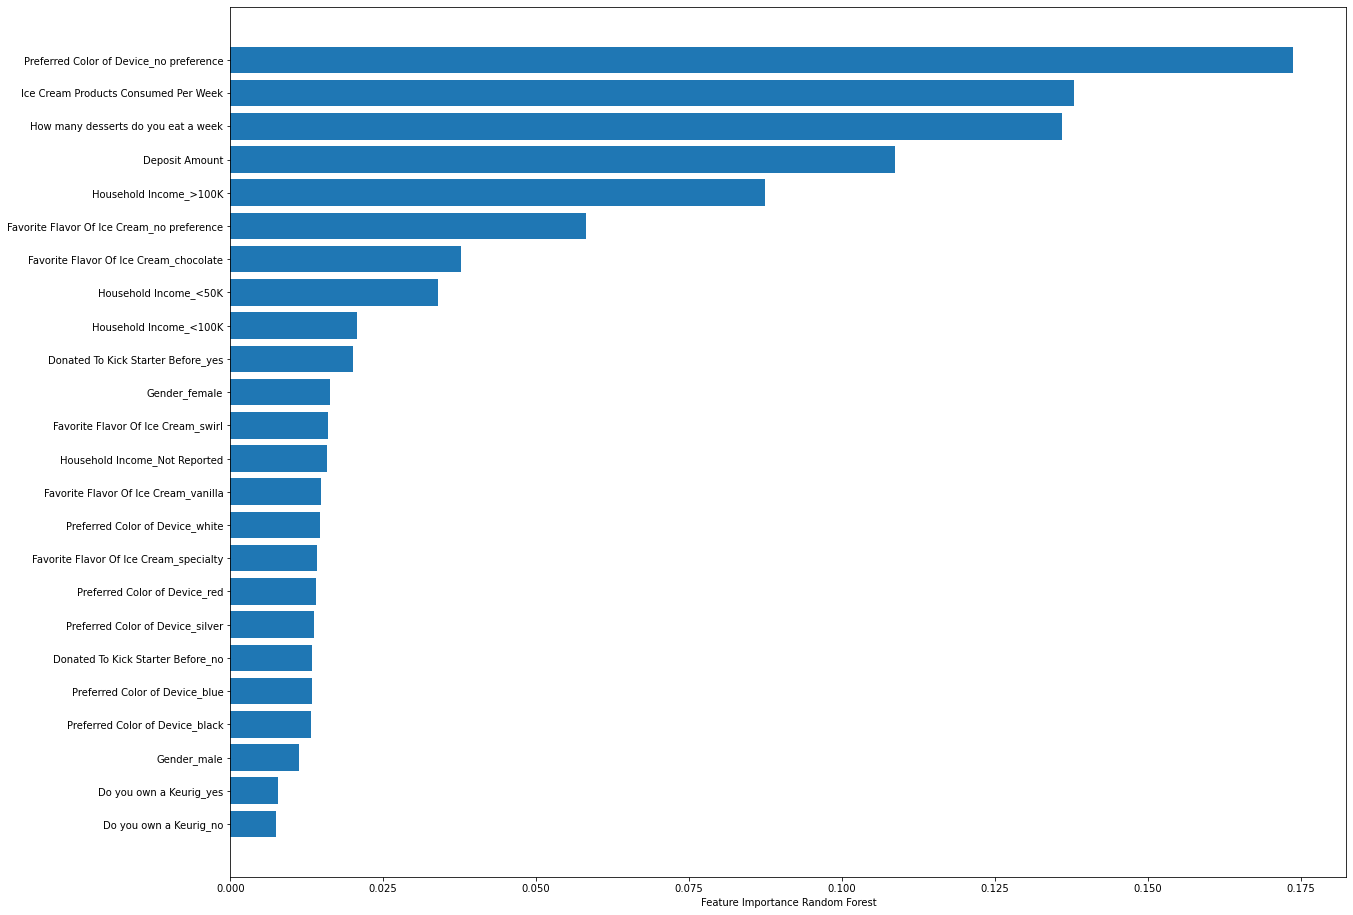

In [131]:
fig, ax = plt.subplots(figsize=(20,16))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train_R.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance Random Forest")

In [241]:
# Summarising all results 
acc1 = accuracy_score(y_test,y_pred)
prec1 = precision_score(y_test, y_pred)
rec1 = recall_score(y_test, y_pred)
f11 = f1_score(y_test,y_pred)

acc2 = accuracy_score(y_test2, y_pred2_rfe)
prec2 = precision_score(y_test2, y_pred2_rfe)
rec2 = recall_score(y_test2, y_pred2_rfe)
f12 = f1_score(y_test2, y_pred2_rfe)

acc2_1 = accuracy_score(y_test2_1, y_pred2)
prec2_1 = precision_score(y_test2_1, y_pred2)
rec2_1 = recall_score(y_test2_1, y_pred2)
f12_1 = f1_score(y_test2_1, y_pred2)

acc3 = accuracy_score(y_test_R, rf_y)
prec3 = precision_score(y_test_R, rf_y)
rec3 = recall_score(y_test_R, rf_y)
f13 = f1_score(y_test_R, rf_y)


results = pd.DataFrame([['Logistic Regression', acc1,prec1,rec1],
                       ['Logistic Regression with RFE', acc2,prec2,rec2],
                       ['Random forest', acc3,prec3,rec3],],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall'])
results


Model  Accuracy  Precision    Recall
0           Logistic Regression  0.850667   0.876029  0.904048
1  Logistic Regression with RFE  0.844000   0.861046  0.913543
2                 Random forest  0.890667   0.914187  0.922422

# Cumulative Accuracy Profile (CAP)

In [215]:
#Plotting Cumulative Accuracy Profile (CAP)
y_pred_prob = logit_model1.predict_proba(X_test)
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()

### CAP for logistic regression

      0         1
0   1.0  0.999998
1   1.0  0.999998
2   1.0  0.999997
3   1.0  0.999991
4   1.0  0.999989
5   1.0  0.999983
6   1.0  0.999982
7   1.0  0.999981
8   1.0  0.999980
9   1.0  0.999980
10  1.0  0.999976
11  1.0  0.999975
12  1.0  0.999975
13  1.0  0.999971
14  1.0  0.999970
15  1.0  0.999970
16  1.0  0.999967
17  1.0  0.999966
18  1.0  0.999964
19  1.0  0.999962


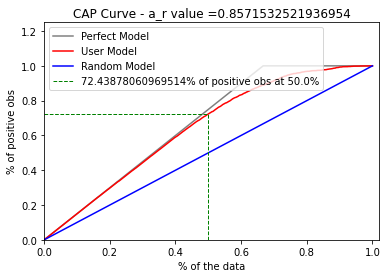

In [216]:
capcurve(y_test,y_pred_prob[:,1])


### CPA for logistic regression with RFE

      0         1
0   1.0  0.999960
1   1.0  0.999956
2   1.0  0.999954
3   1.0  0.999954
4   1.0  0.999953
5   1.0  0.999953
6   1.0  0.999949
7   1.0  0.999949
8   1.0  0.999948
9   1.0  0.999934
10  1.0  0.999930
11  1.0  0.999926
12  1.0  0.999925
13  1.0  0.999913
14  1.0  0.999907
15  1.0  0.999907
16  1.0  0.999907
17  1.0  0.999898
18  1.0  0.999892
19  1.0  0.999885


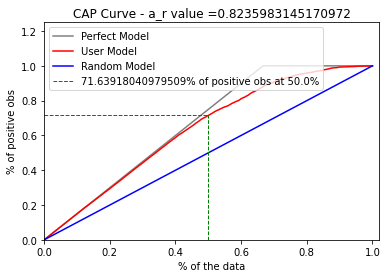

In [217]:
y_pred_prob2 = logreg2_rfe.predict_proba(X_test2)
capcurve(y_test2,y_pred_prob2[:,1])


### CAP for random forest

      0    1
0   1.0  1.0
1   1.0  1.0
2   1.0  1.0
3   1.0  1.0
4   1.0  1.0
5   1.0  1.0
6   1.0  1.0
7   1.0  1.0
8   1.0  1.0
9   1.0  1.0
10  1.0  1.0
11  1.0  1.0
12  1.0  1.0
13  1.0  1.0
14  1.0  1.0
15  1.0  1.0
16  1.0  1.0
17  1.0  1.0
18  1.0  1.0
19  1.0  1.0


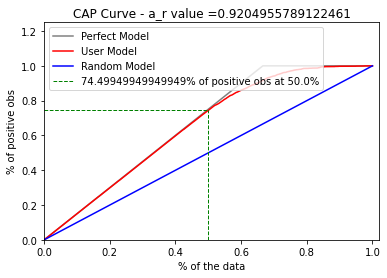

In [219]:
y_pred_prob3 = rf.predict_proba(X_test_R)
capcurve(y_test_R,y_pred_prob3[:,1])